In [1]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import os


import matplotlib as mpl
import scipy
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar
import xskillscore as xs
from scipy.stats import iqr
import matplotlib.patches as patches

In [2]:
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'u':'_ucur.nc', 'v':'_vcur.nc', 'w':"_wcur.nc", 'tos': "_tos.nc", 'dty':"_dty.nc", "va":"_v_advection.nc"}
models={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    if model in ['NESM3']:
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
            except Exception as e:
                print(e)
                pass
        #now append data to model dict
        models[model] = mod
del models["not_full"]

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_wcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_tos.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_dty.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_v_advection.nc'


In [3]:
import pandas as pd

In [4]:
season_order = xr.DataArray(data=['DJF', 'MAM', 'JJA', 'SON'],
    dims={'season': ['DJF', 'MAM', 'JJA', 'SON']})

In [5]:
months = [f'2000-{str(month).zfill(2)}' for month in range(1, 13)]


In [6]:
for i, mod in enumerate(models.keys()):
    sst = models[mod]['tos']
    sst = sst.assign_coords({"model":i})
    sst = sst.rename({'month': 'time'})
    sst = sst.assign_coords({'time':pd.to_datetime(months)})
    sst = sst.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        sstm = sst
    else:
        sstm = xr.concat([sstm, sst], dim = 'model')
sstMM = sstm.median('model')


In [7]:
for i, mod in enumerate(models.keys()):
    u = models[mod]['u']
    u = u.assign_coords({"model":i})
    u = u.rename({'month': 'time'})
    u = u.assign_coords({'time':pd.to_datetime(months)})
    u = u.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        um = u
    else:
        um = xr.concat([um, u], dim = 'model')
for i, mod in enumerate(models.keys()):
    v = models[mod]['v']
    v = v.assign_coords({"model":i})
    v = v.rename({'month': 'time'})
    v = v.assign_coords({'time':pd.to_datetime(months)})
    v = v.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        vm = v
    else:
        vm = xr.concat([vm, v], dim = 'model')
for i, mod in enumerate(models.keys()):
    w = models[mod]['w']
    w = w.assign_coords({"model":i})
    w = w.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        wm = w
    else:
        wm = xr.concat([wm, w], dim = 'model')
for i, mod in enumerate(models.keys()):
    w = models[mod]['dty']
    w = w.assign_coords({"model":i})
    w = w.rename({'month': 'time'})
    w = w.assign_coords({'time':pd.to_datetime(months)})
    w = w.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        dtym = w
    else:
        dtym = xr.concat([dtym, w], dim = 'model')

for i, mod in enumerate(models.keys()):
    w = models[mod]['va']
    w = w.assign_coords({"model":i})
    w = w.rename({'month': 'time'})
    w = w.assign_coords({'time':pd.to_datetime(months)})
    w = w.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        vam = w
    else:
        vam = xr.concat([vam, w], dim = 'model')        
        
uMM = um.median('model')
vMM = vm.median('model')
wMM = wm.median('model')
dtyMM = dtym.median("model")
vaMM = vam.median("model")
spd = xr.ufuncs.sqrt(uMM**2 +vMM**2)

In [8]:
#Load SODA3 data
datadir = '/home/z5113258/Documents/data/REAN_HB/'
#dict with file names
varis = {'u':'_ucur.nc', 'v':'_vcur.nc', 'w':"_wcur.nc", 'tos': "_tos.nc", 'dty':"_dty.nc", "va":"_v_advection.nc"}
rean={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis

    mod={}
    for key in varis.keys():
        #input file
        inp_files = (os.path.join(datadir, model, str(model+varis[key])))
        try:
            #load in file
            var = xr.open_dataarray(inp_files)
            #put into dict
            mod[key]=var
        except Exception as e:
            print(e)
            pass
    #now append data to model dict
    rean[model] = mod

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_wcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_tos.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_dty.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_v_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_wcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_tos.nc'
[Errno 2] No

In [9]:
i = 0
for mod in rean.keys():
    try:
        u = rean[mod]['u']
        u = u.assign_coords({"model":i})
        u = u.rename({'month': 'time'})
        u = u.assign_coords({'time':pd.to_datetime(months)})
        u = u.groupby("time.season").mean("time").reindex(season=season_order)
        u = u.sel(lon = slice(30,125), lat = slice(-30,30))
        if i == 0:
            um = u
        else:
            um = xr.concat([um, u], dim = 'model')
        i = i+1
    except:
        print("u doesn't exist for "+mod)
i = 0
for mod in rean.keys():
    try:
        v = rean[mod]['v']
        v = v.assign_coords({"model":i})
        v = v.rename({'month': 'time'})
        v = v.assign_coords({'time':pd.to_datetime(months)})
        v = v.groupby("time.season").mean("time").reindex(season=season_order)
        v = v.sel(lon = slice(30,125), lat = slice(-30,30))

        if i == 0:
            vm = v
        else:
            vm = xr.concat([vm, v], dim = 'model')
        i = i+1
    except:
        print("v doesn't exist for "+mod)

uRM = um.median('model')
vRM = vm.median('model')
spd_r = xr.ufuncs.sqrt(uRM**2 +vRM**2)

u doesn't exist for OAFLUX
u doesn't exist for ERA5
u doesn't exist for ARGO
v doesn't exist for OAFLUX
v doesn't exist for ERA5
v doesn't exist for ARGO


In [10]:
#spd_r = xr.ufuncs.sqrt(uRM**2 +vRM**2)
spd_b = spd - spd_r
uB = uMM - uRM
vB = vMM - vRM

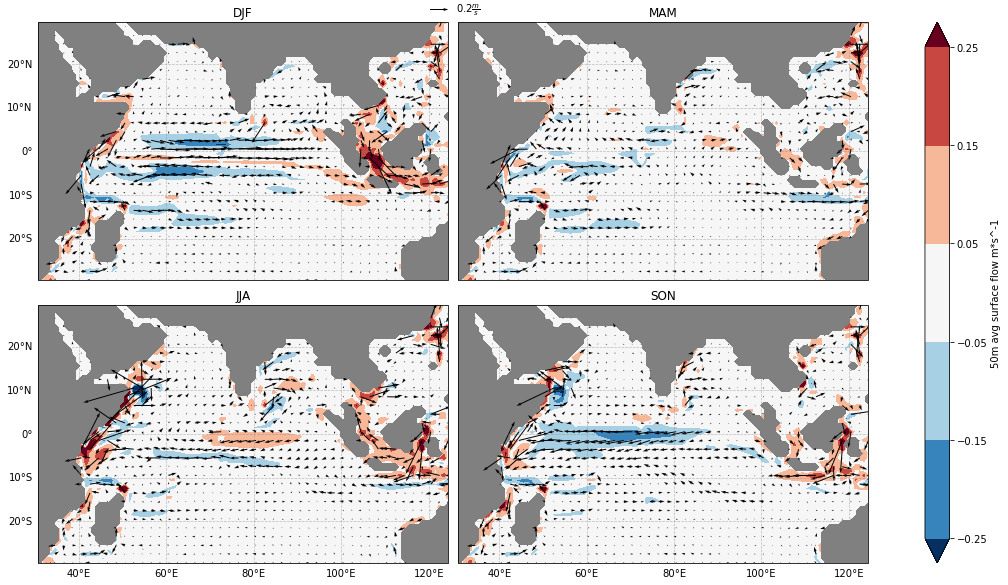

In [36]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = spd_b.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = -0.25, vmax = 0.25, levels =6,  cmap = 'RdBu_r',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='50m avg surface flow m*s^-1'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/fig3-51.svg',pad_inches = 1,  bbox_inches = 'tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

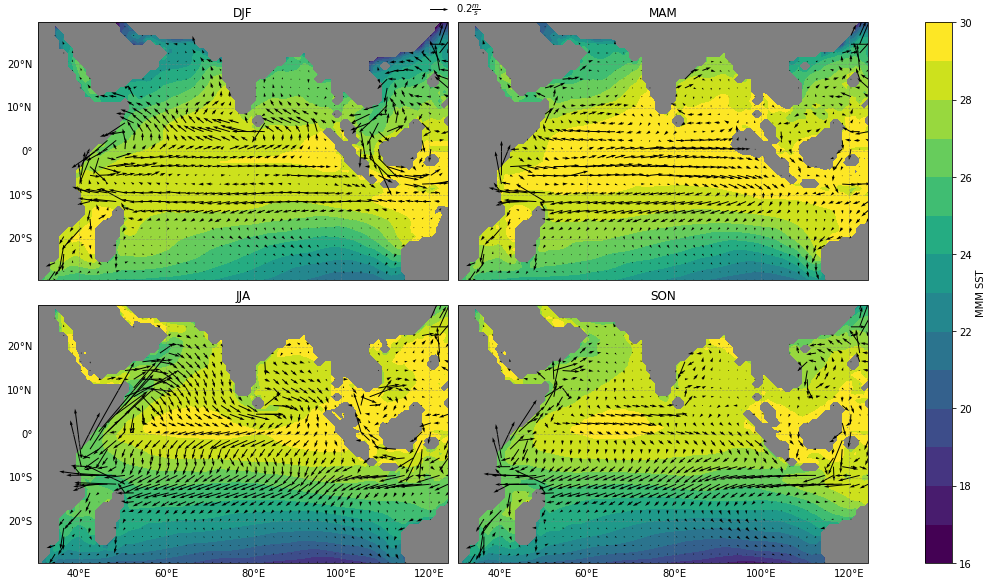

In [34]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = sstMM.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 16, vmax = 30, levels =15,  cmap = 'viridis',#can do 11 or 21 levels
                                extend = "neither", cbar_kwargs=dict(label='MMM SST')) 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False

#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/fig3-52.eps',pad_inches = 1,  bbox_inches = 'tight')


In [54]:
spd_b2 = xr.ufuncs.sqrt(uB**2 +vB**2)

<ipython-input-60-8a5110b478ee>:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
<ipython-input-60-8a5110b478ee>:66: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


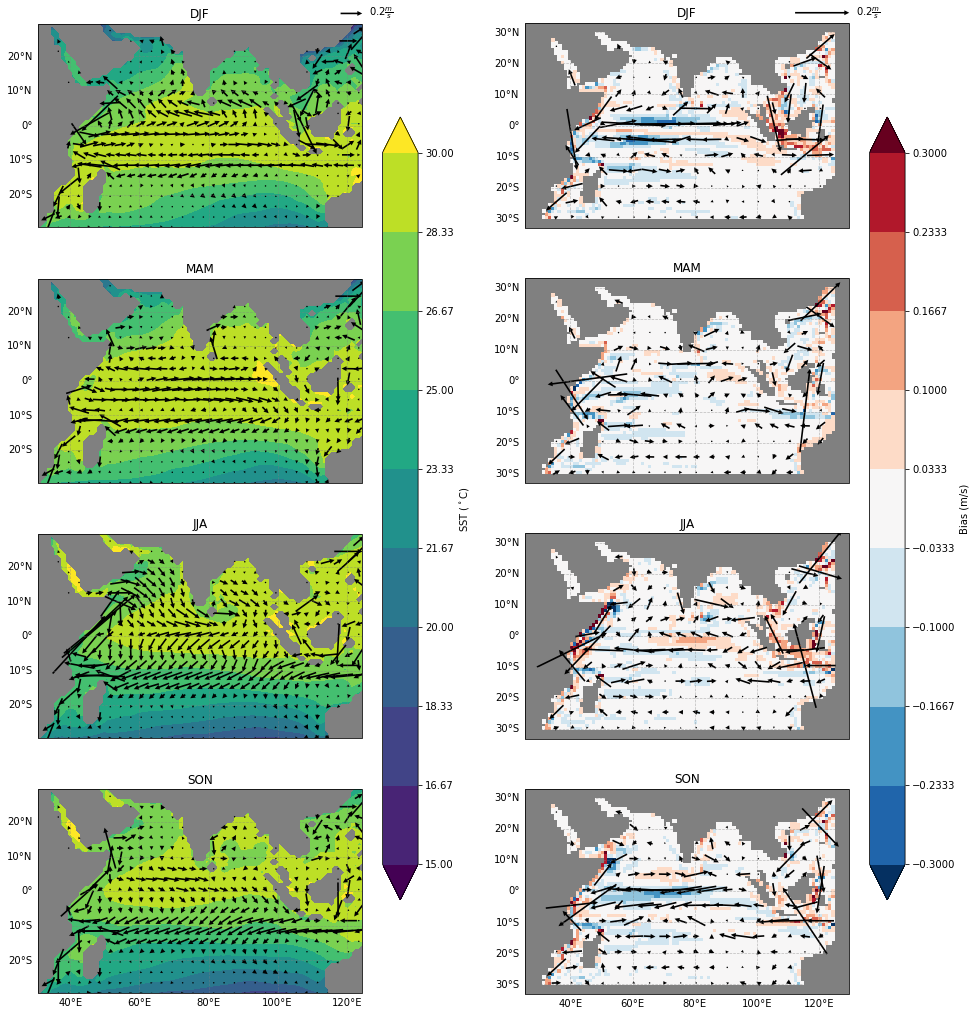

In [60]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through seasons and plot the DataArrays
for i, season in enumerate(seasons):
    # Plot da1 in column 1
    m = sstMM.sel(season=season).plot.contourf(ax=axes[i, 0], vmin = 15, vmax = 30, levels = 10, cmap='viridis', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,0].quiver(uMM.lon[::3], uMM.lat[::3], uMM[i, ::3,::3], vMM[i, ::3,::3], 
                  transform=ccrs.PlateCarree(), scale = 3, width = 0.005, 
                             pivot = 'mid', headaxislength=3, headlength = 3)
        qk = axes[i,0].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,0].quiver(uMM.lon[::3], uMM.lat[::3], uMM[i, ::3,::3], vMM[i, ::3,::3], 
                  transform=ccrs.PlateCarree(), scale = 3, width = 0.005, 
                         pivot = "mid",headaxislength=3, headlength = 3)
    #CS = axes[i,0].contour(wMM.lon, wMM.lat, wMM[i], levels =[-1e-6,1e-6],
    #                          transform=ccrs.PlateCarree(),colors = 'k', linewidths = 0.7, negative_linestyles = '..')
    
        #CS = ax.contour(vmm.lon, vmm.lat, vmm[i],  colors = 'k', levels = 7, linewidths = 0.4)
    #axes[i,0].clabel(CS, CS.levels, inline=False, fontsize=10)
    #ax.coastlines()
    axes[i,0].set_facecolor('grey')
    gl = axes[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 0].set_title(f'{season}')
    
    # Plot da2 in column 2
    b = spd_b.sel(season=season).plot(ax=axes[i, 1], vmin = -0.3, vmax = 0.3, levels = 10, cmap='RdBu_r', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,1].quiver(uB.lon[::5], uB.lat[::5], uB[i, ::5,::5], vB[i, ::5,::5], 
                  transform=ccrs.PlateCarree(), scale = 1.2, width = 0.005, 
                             pivot = "mid", headwidth =3,headaxislength=3, headlength = 3)
        qk = axes[i,1].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,1].quiver(uB.lon[::5], uB.lat[::5], uB[i, ::5,::5], vB[i, ::5,::5],
                  transform=ccrs.PlateCarree(), scale = 1.2, width = 0.005, 
                         pivot = "mid", headwidth =3,headaxislength=3, headlength = 3)
    #ax.coastlines()
    axes[i,1].set_facecolor('grey')
    gl = axes[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 1].set_title(f'{season}') 
cbar1 = plt.colorbar(m, ax=axes[:, 0], orientation='vertical', shrink=0.8, pad=0.05)
cbar1.set_label('SST ($^\circ$C) ')

# Add a colorbar for da2 spanning the entire right column
cbar2 = plt.colorbar(b, ax=axes[:, 1], orientation='vertical', shrink=0.8, pad=0.05)
cbar2.set_label('Bias (m/s)')    

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/F_3-5.png', dpi = 600,pad_inches = 1,  bbox_inches = 'tight', facecolor = 'white')


<ipython-input-79-be1ad07f8d3a>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
<ipython-input-79-be1ad07f8d3a>:62: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


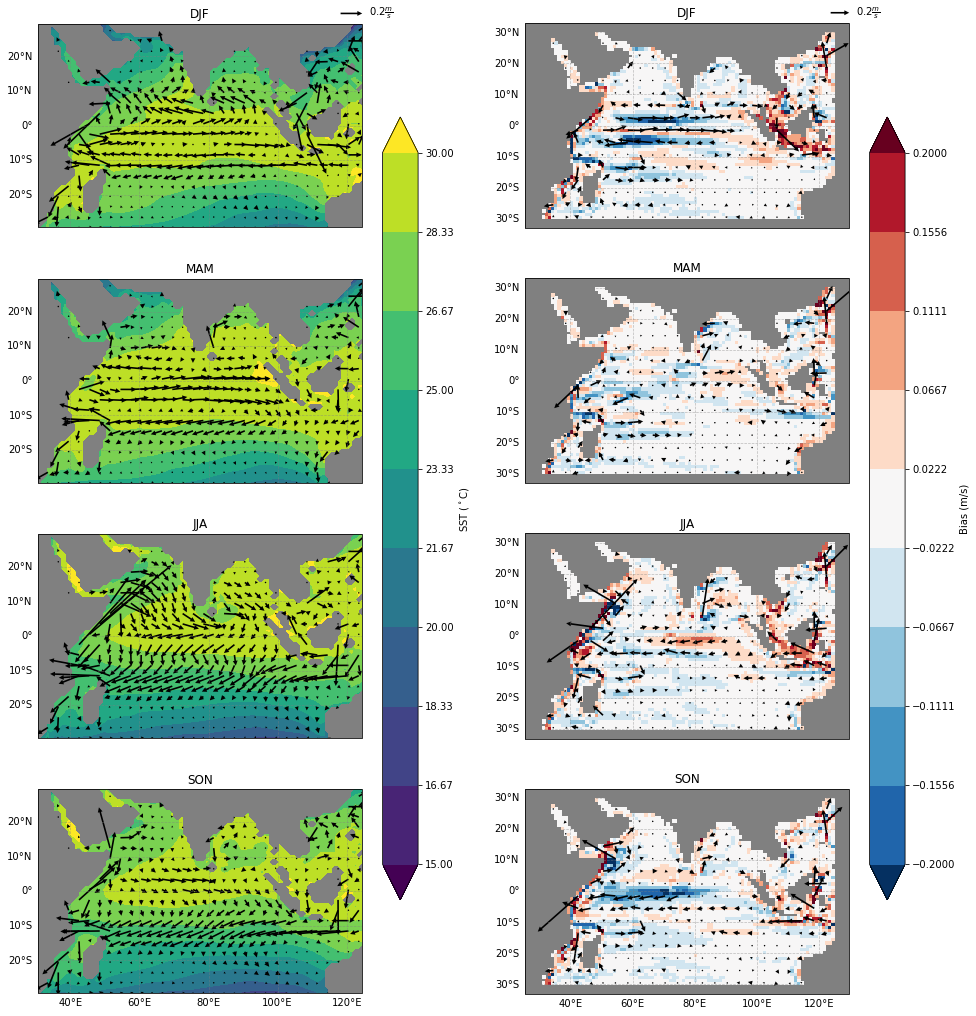

In [79]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through seasons and plot the DataArrays
for i, season in enumerate(seasons):
    # Plot da1 in column 1
    m = sstMM.sel(season=season).plot.contourf(ax=axes[i, 0], vmin = 15, vmax = 30, levels = 10, cmap='viridis', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,0].quiver(uMM.lon[::3], uMM.lat[::3], uMM[i, ::3,::3], vMM[i, ::3,::3], 
                  transform=ccrs.PlateCarree(), scale = 3, width = 0.005, headaxislength=3, headlength = 3)
        qk = axes[i,0].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,0].quiver(uMM.lon[::3], uMM.lat[::3], uMM[i, ::3,::3], vMM[i, ::3,::3], 
                  transform=ccrs.PlateCarree(), scale = 3, width = 0.005, headaxislength=3, headlength = 3)
    #CS = axes[i,0].contour(wMM.lon, wMM.lat, wMM[i], levels =[-1e-6,1e-6],
    #                          transform=ccrs.PlateCarree(),colors = 'k', linewidths = 0.7, negative_linestyles = '..')
    
        #CS = ax.contour(vmm.lon, vmm.lat, vmm[i],  colors = 'k', levels = 7, linewidths = 0.4)
    #axes[i,0].clabel(CS, CS.levels, inline=False, fontsize=10)
    #ax.coastlines()
    axes[i,0].set_facecolor('grey')
    gl = axes[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 0].set_title(f'{season}')
    
    # Plot da2 in column 2
    b = spd_b.sel(season=season).plot(ax=axes[i, 1], vmin = -0.2, vmax = 0.2, levels = 10, cmap='RdBu_r', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,1].quiver(uB.lon[::4], uB.lat[::4], uB[i, ::4,::4], vB[i, ::4,::4], 
                  transform=ccrs.PlateCarree(), scale = 3.5, width = 0.005, headwidth =3,headaxislength=3, headlength = 3)
        qk = axes[i,1].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,1].quiver(uB.lon[::4], uB.lat[::4], uB[i, ::4,::4], vB[i, ::4,::4], 
                  transform=ccrs.PlateCarree(), scale = 3.5, width = 0.005, headwidth =3,headaxislength=3, headlength = 3)
    #ax.coastlines()
    axes[i,1].set_facecolor('grey')
    gl = axes[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 1].set_title(f'{season}') 
cbar1 = plt.colorbar(m, ax=axes[:, 0], orientation='vertical', shrink=0.8, pad=0.05)
cbar1.set_label('SST ($^\circ$C) ')

# Add a colorbar for da2 spanning the entire right column
cbar2 = plt.colorbar(b, ax=axes[:, 1], orientation='vertical', shrink=0.8, pad=0.05)
cbar2.set_label('Bias (m/s)')    

# Adjust spacing between subplots
plt.tight_layout()


<ipython-input-81-be1ad07f8d3a>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
<ipython-input-81-be1ad07f8d3a>:62: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


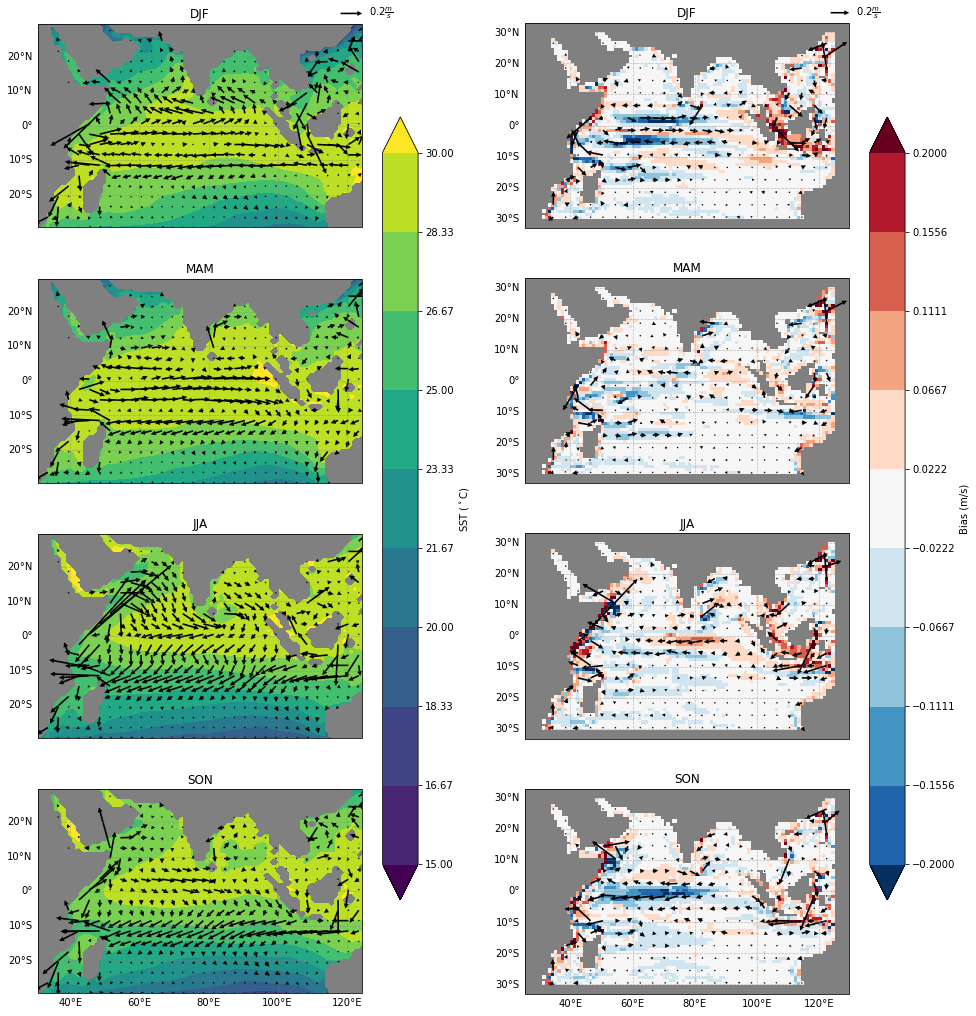

In [81]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through seasons and plot the DataArrays
for i, season in enumerate(seasons):
    # Plot da1 in column 1
    m = sstMM.sel(season=season).plot.contourf(ax=axes[i, 0], vmin = 15, vmax = 30, levels = 10, cmap='viridis', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,0].quiver(uMM.lon[::3], uMM.lat[::3], uMM[i, ::3,::3], vMM[i, ::3,::3], 
                  transform=ccrs.PlateCarree(), scale = 3, width = 0.005, headaxislength=3, headlength = 3)
        qk = axes[i,0].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,0].quiver(uMM.lon[::3], uMM.lat[::3], uMM[i, ::3,::3], vMM[i, ::3,::3], 
                  transform=ccrs.PlateCarree(), scale = 3, width = 0.005, headaxislength=3, headlength = 3)
    #CS = axes[i,0].contour(wMM.lon, wMM.lat, wMM[i], levels =[-1e-6,1e-6],
    #                          transform=ccrs.PlateCarree(),colors = 'k', linewidths = 0.7, negative_linestyles = '..')
    
        #CS = ax.contour(vmm.lon, vmm.lat, vmm[i],  colors = 'k', levels = 7, linewidths = 0.4)
    #axes[i,0].clabel(CS, CS.levels, inline=False, fontsize=10)
    #ax.coastlines()
    axes[i,0].set_facecolor('grey')
    gl = axes[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 0].set_title(f'{season}')
    
    # Plot da2 in column 2
    b = spd_b.sel(season=season).plot(ax=axes[i, 1], vmin = -0.2, vmax = 0.2, levels = 10, cmap='RdBu_r', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,1].quiver(uB.lon[::4], uB.lat[::4], uB[i, ::4,::4], vB[i, ::4,::4], 
                  transform=ccrs.PlateCarree(), scale = 3.5, width = 0.005, headwidth =3,headaxislength=3, headlength = 3)
        qk = axes[i,1].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,1].quiver(uB.lon[::4], uB.lat[::4], uB[i, ::4,::4], vB[i, ::4,::4], 
                  transform=ccrs.PlateCarree(), scale = 3.5, width = 0.005, headwidth =3,headaxislength=3, headlength = 3)
    #ax.coastlines()
    axes[i,1].set_facecolor('grey')
    gl = axes[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 1].set_title(f'{season}') 
cbar1 = plt.colorbar(m, ax=axes[:, 0], orientation='vertical', shrink=0.8, pad=0.05)
cbar1.set_label('SST ($^\circ$C) ')

# Add a colorbar for da2 spanning the entire right column
cbar2 = plt.colorbar(b, ax=axes[:, 1], orientation='vertical', shrink=0.8, pad=0.05)
cbar2.set_label('Bias (m/s)')    

# Adjust spacing between subplots
plt.tight_layout()


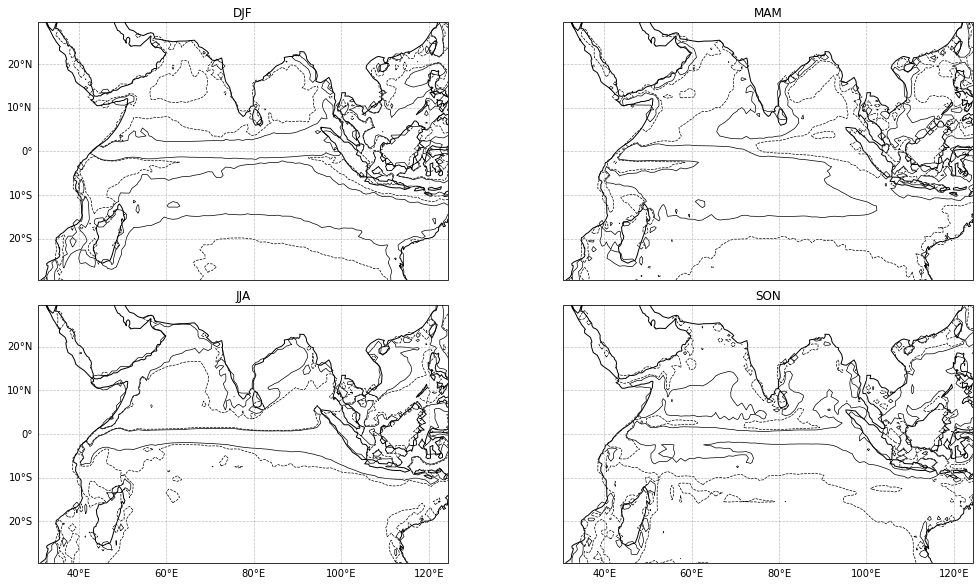

In [55]:

fg = wMM.plot.contour(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), levels = [-1e-6,  1e-6], 
                      colors = 'k', linewidths = 0.7, negative_linestyles = '..')
for i, ax in enumerate(fg.axes.flat):
    #if i ==0:
    #    Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
    #              transform=ccrs.PlateCarree(), scale = 4.5)
    #else:
    #    ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2],
    #              transform=ccrs.PlateCarree(), scale = 4.5)
    ax.coastlines()
    #ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    #ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    #ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    #ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    #ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )

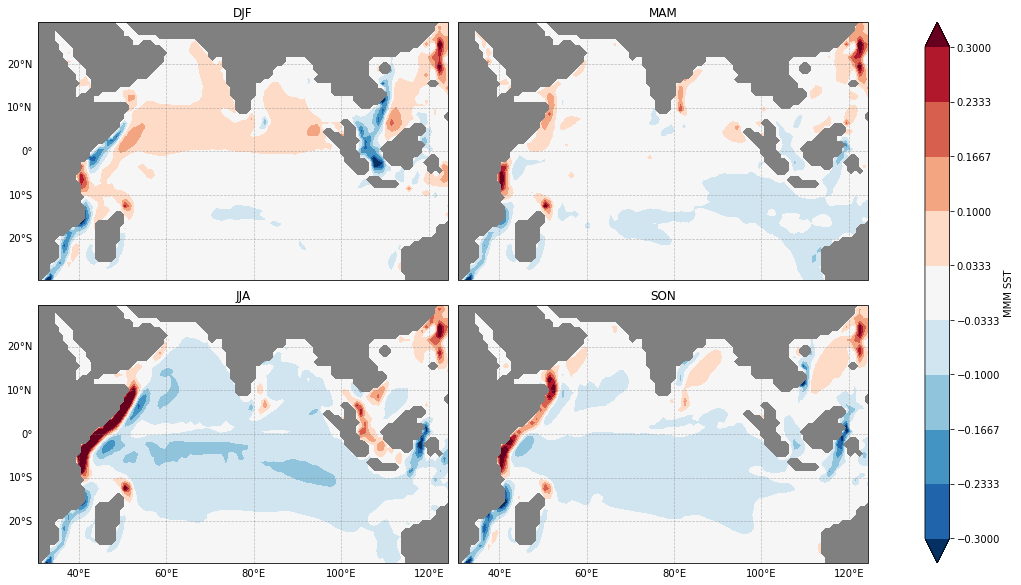

In [60]:
fg = vMM.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = -0.3, vmax = 0.3, levels =10,  cmap = 'RdBu_r',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='MMM SST'), extend = 'both')
for i, ax in enumerate(fg.axes.flat):
    #if i ==0:
    #    Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
    #              transform=ccrs.PlateCarree(), scale = 4.5)
    #else:
    #    ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2],
    #              transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    #ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    #ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    #ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    #ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )

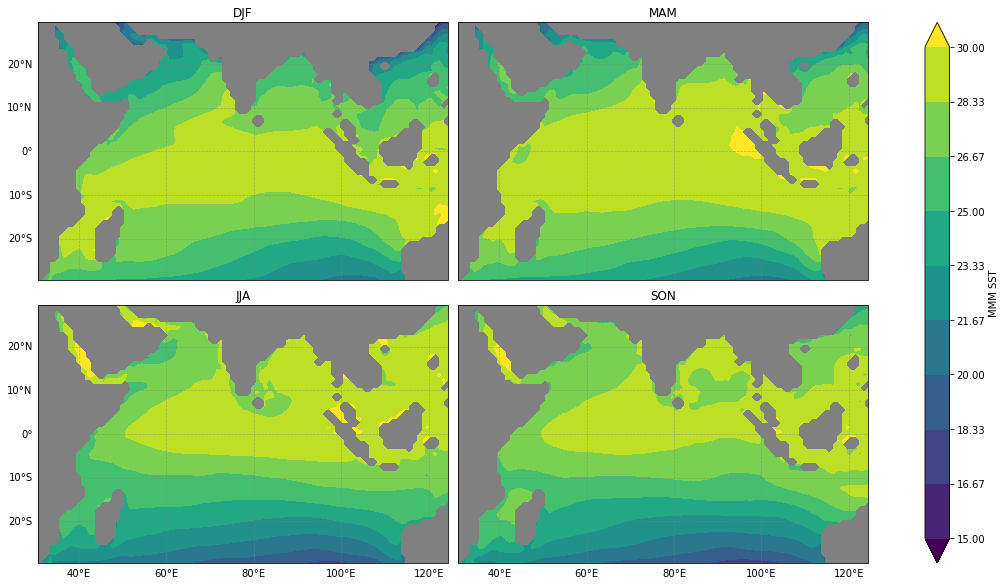

In [25]:
fg = sstMM.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 15, vmax = 30, levels =10,  cmap = 'viridis',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='MMM SST'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    #if i ==0:
    #    Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
    #              transform=ccrs.PlateCarree(), scale = 4.5)
    #else:
    #    ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2],
    #              transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    #ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    #ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    #ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    #ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
#qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
#                   coordinates='axes')

In [72]:
i = 0
for mod in rean.keys():
    try:
        u = rean[mod]['u']
        u = u.assign_coords({"model":i})
        u = u.rename({'month': 'time'})
        u = u.assign_coords({'time':pd.to_datetime(months)})
        u = u.groupby("time.season").mean("time").reindex(season=season_order)
        if i == 0:
            um = u
        else:
            um = xr.concat([um, u], dim = 'model')
        i = i+1
    except:
        print("u doesn't exist for "+mod)
i = 0
for mod in rean.keys():
    try:
        v = rean[mod]['v']
        v = v.assign_coords({"model":i})
        v = v.rename({'month': 'time'})
        v = v.assign_coords({'time':pd.to_datetime(months)})
        v = v.groupby("time.season").mean("time").reindex(season=season_order)
        if i == 0:
            vm = u
        else:
            vm = xr.concat([vm, v], dim = 'model')
        i = i+1
    except:
        print("v doesn't exist for "+mod)

uRM = um.median('model')
vRM = vm.median('model')
spd_r = xr.ufuncs.sqrt(uRM**2 +vRM**2)

u doesn't exist for OAFLUX
u doesn't exist for ERA5
u doesn't exist for ARGO
v doesn't exist for OAFLUX
v doesn't exist for ERA5
v doesn't exist for ARGO


In [52]:
spd = xr.ufuncs.sqrt(uMM**2 +vMM**2)

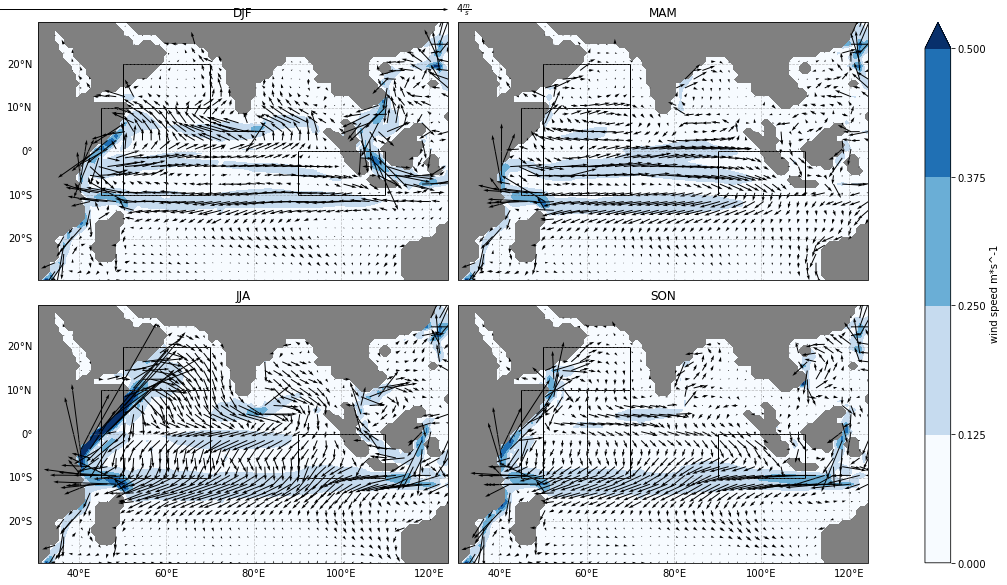

In [9]:
#E5x1 = E5x.sel(lat=slice(-30, 30), lon = slice(30, 120))
#E5y1 = E5y.sel(lat=slice(-30, 30), lon = slice(30, 120))
#spdE5 = spdE5.sel(lat=slice(-30, 30), lon = slice(30, 120))
fg = spd.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 0, vmax = 0.5, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    else:
        ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 4, r'$4 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

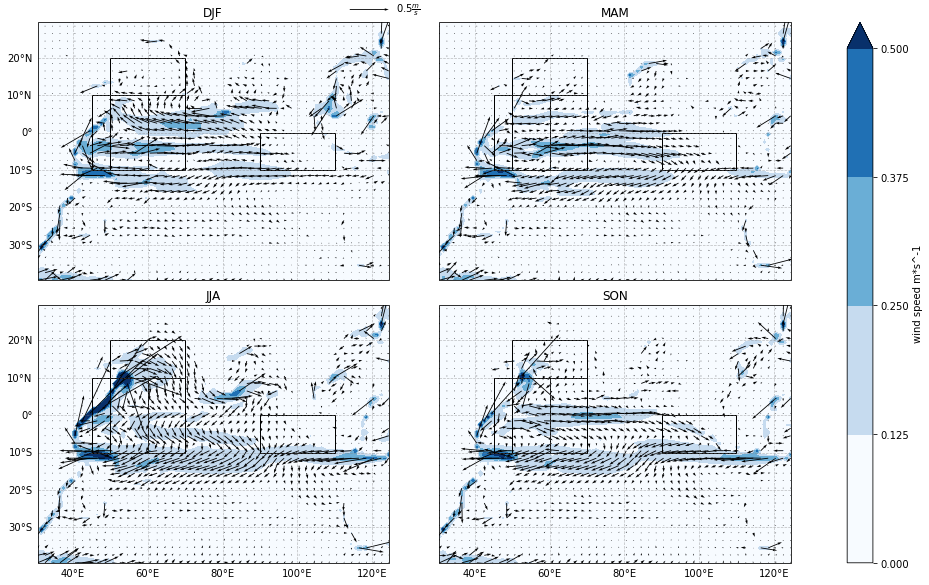

In [77]:

fg = spd_r.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 0, vmax = 0.5, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uRM.lon[::2], uRM.lat[::2], uRM[i, ::2,::2], vRM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uRM.lon[::2], uRM.lat[::2], uRM[i, ::2,::2], vRM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

In [ ]:
#calcualte bias in surface currents

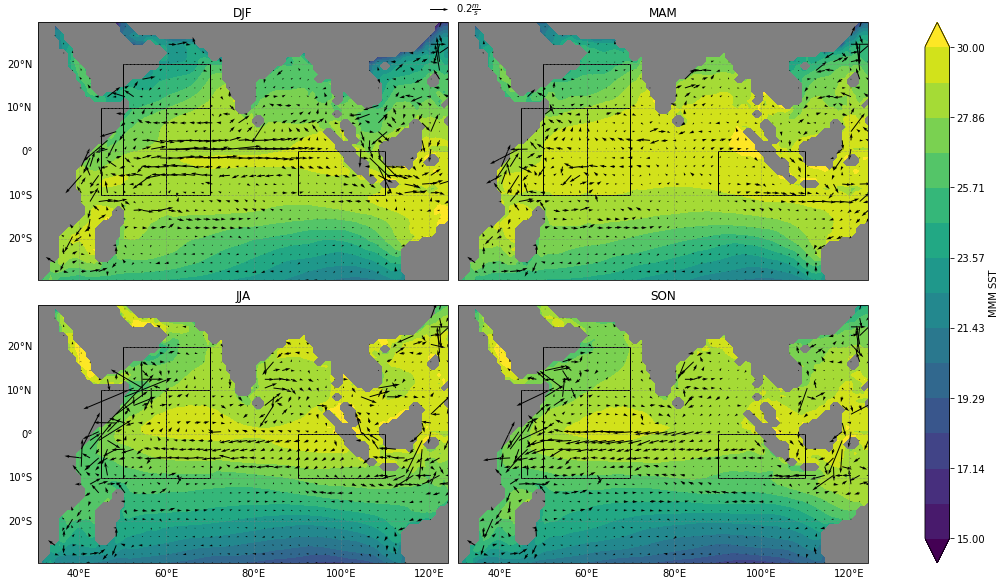

In [87]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = sstMM.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 15, vmax = 30, levels =15,  cmap = 'viridis',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='MMM SST'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

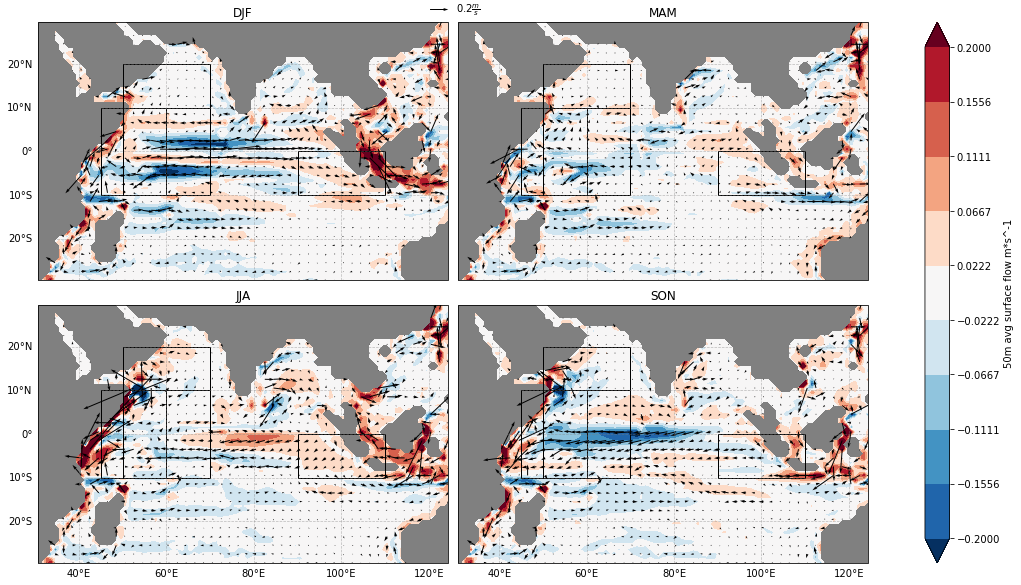

In [88]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = spd_b.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = -0.2, vmax = 0.2, levels =10,  cmap = 'RdBu_r',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='50m avg surface flow m*s^-1'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

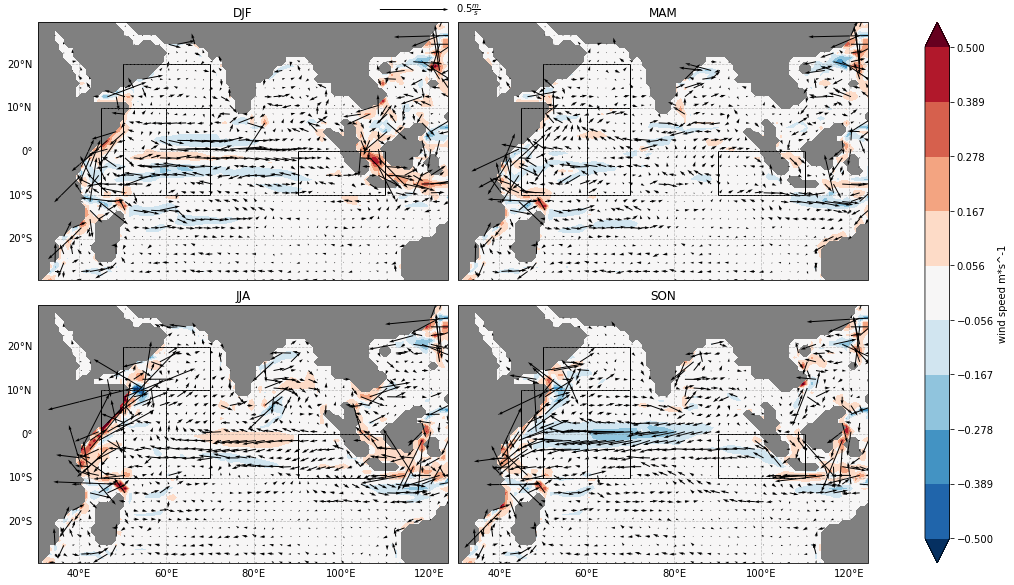

In [69]:
spd_b = spd-spd_r
uB = uMM- u
vB = vMM - v
fg = spd_b.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = -0.2, vmax = 0.5, levels =10,  cmap = 'RdBu_r',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    else:
        ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

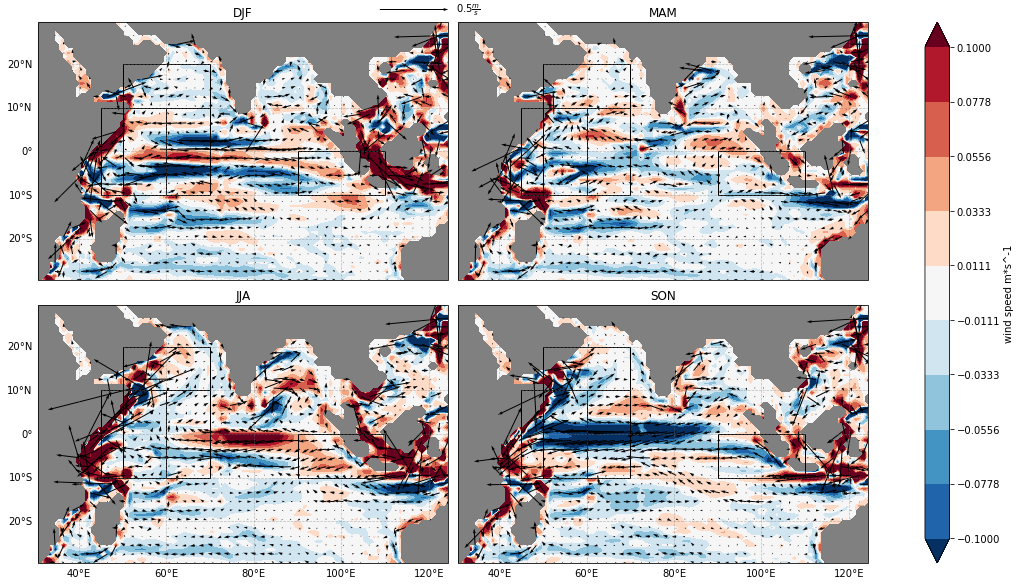

In [62]:
spd_b = spd-spd_r
uB = uMM- u
vB = vMM - v
fg = spd_b.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = -0.1, vmax = 0.1, levels =10,  cmap = 'RdBu_r',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    else:
        ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

In [79]:
#Load SODA3 data
datadir = '/home/z5113258/Documents/data/REAN_HB/'
#dict with file names
varis = {'tos':'_tos.nc'}
rean={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis

    mod={}
    for key in varis.keys():
        #input file
        inp_files = (os.path.join(datadir, model, str(model+varis[key])))
        try:
            #load in file
            var = xr.open_dataarray(inp_files)
            #put into dict
            mod[key]=var
        except Exception as e:
            print(e)
            pass
    #now append data to model dict
    rean[model] = mod

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_tos.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_tos.nc'


In [10]:
#Load SODA3 data
datadir = '/home/z5113258/Documents/data/REAN_HB/'
#dict with file names
varis = {'u':'_ucur.nc', 'v':'_vcur.nc'}
rean={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis

    mod={}
    for key in varis.keys():
        #input file
        inp_files = (os.path.join(datadir, model, str(model+varis[key])))
        try:
            #load in file
            var = xr.open_dataarray(inp_files)
            #put into dict
            mod[key]=var
        except Exception as e:
            print(e)
            pass
    #now append data to model dict
    rean[model] = mod

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ARGO/ARGO_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ARGO/ARGO_vcur.nc'


In [11]:
rean.keys()

dict_keys(['OAFLUX', 'GODAS', 'SODA3.4.2', 'ERA5', 'ORAS5', 'ARGO'])

In [12]:
u = rean['SODA3.4.2']['u']
u = u.assign_coords({"model":i})
u = u.rename({'month': 'time'})
u = u.assign_coords({'time':pd.to_datetime(months)})
u = u.groupby("time.season").mean("time").reindex(season=season_order)

v = rean["SODA3.4.2"]['v']
v = v.assign_coords({"model":i})
v = v.rename({'month': 'time'})
v = v.assign_coords({'time':pd.to_datetime(months)})
v = v.groupby("time.season").mean("time").reindex(season=season_order)

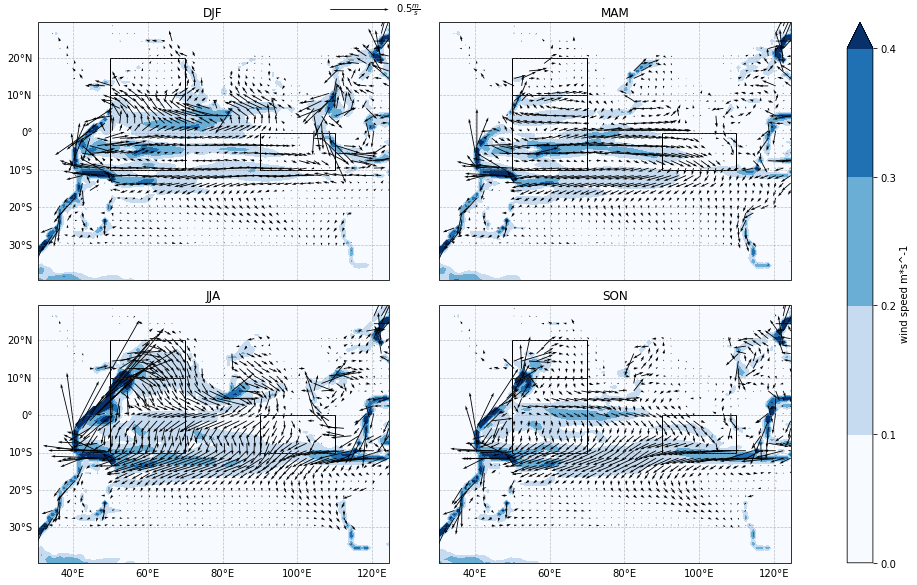

In [13]:
spd = xr.ufuncs.sqrt(u**2 +v**2)
fg = spd.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 0, vmax = 0.4, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    else:
        ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

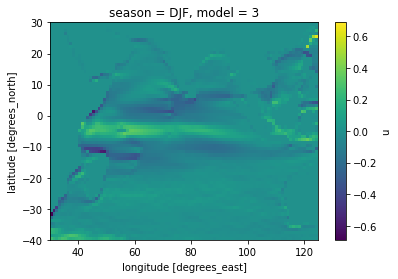

In [87]:
u[0].plot(cmap = 'viridis')

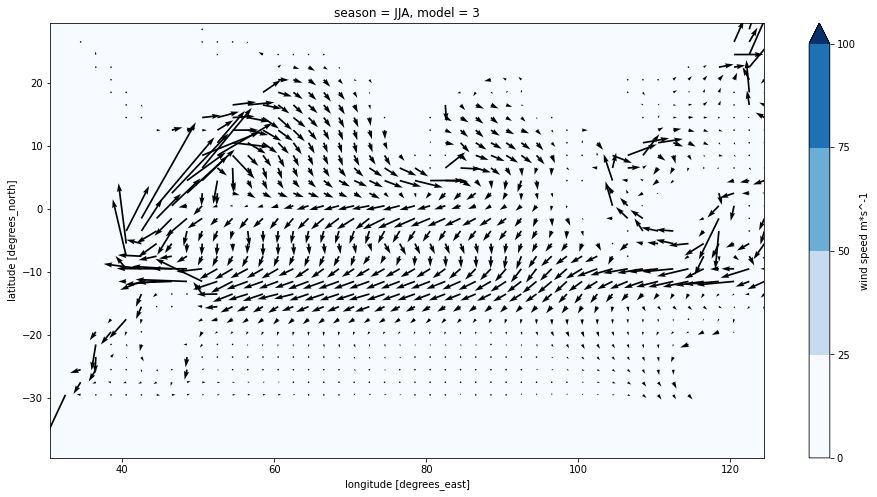

In [99]:
spd = xr.ufuncs.sqrt(u**2 +v**2)
fg = spd[2].plot.contourf(
                              figsize=(16,8), vmin = 0, vmax = 100, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
#for i, ax in enumerate(fg.axes.flat):
#    if i ==0:
plt.quiver(uMM.lon[::2], uMM.lat[::2], uMM[2, ::2,::2], vMM[2, ::2,::2])
#                  transform=ccrs.PlateCarree(), scale = 3)

In [37]:
#load in SST to compare to
OSST = xr.open_mfdataset('/home/z5113258/Documents/data/NOAA_OISSTv2.nc', parallel=True).sst
LSM = xr.open_dataset('/home/z5113258/Documents/data/LSM.nc').mask
OSST= OSST.where(LSM[0])

In [38]:
OSST = OSST.groupby("time.season").mean("time").reindex(season=season_order)

In [39]:
OSST = OSST.sel(lat=slice(-30,30),lon=slice(30,125))

In [107]:
uRM = uRM.sel(lat=slice(-30,30),lon=slice(30,125))
vRM = vRM.sel(lat=slice(-30,30),lon=slice(30,125))

In [100]:
sstbias = sstMM - OSST

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


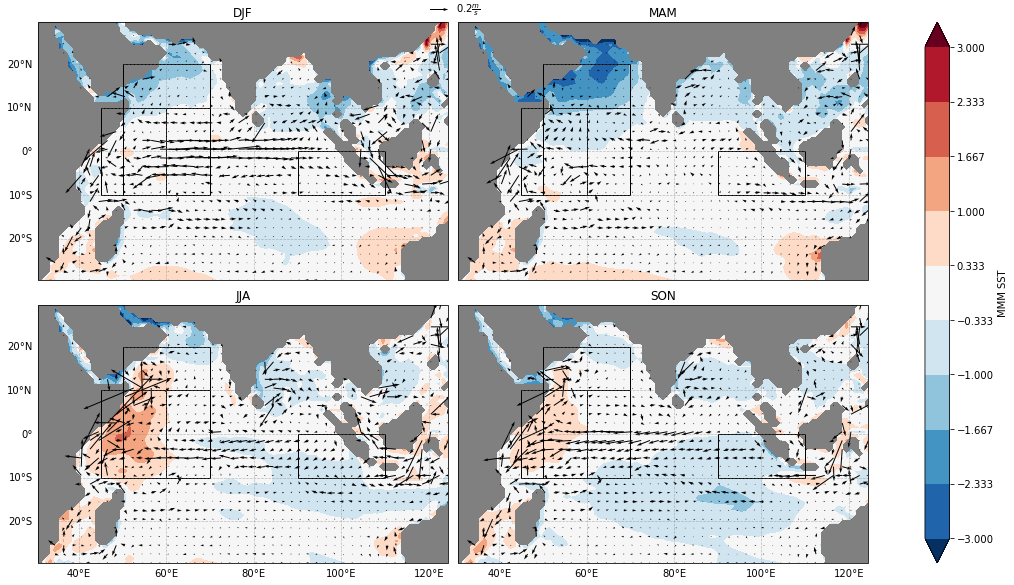

In [98]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = sstbias.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = -3, vmax = 3, levels =10,  cmap = 'RdBu_r',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='MMM SST'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


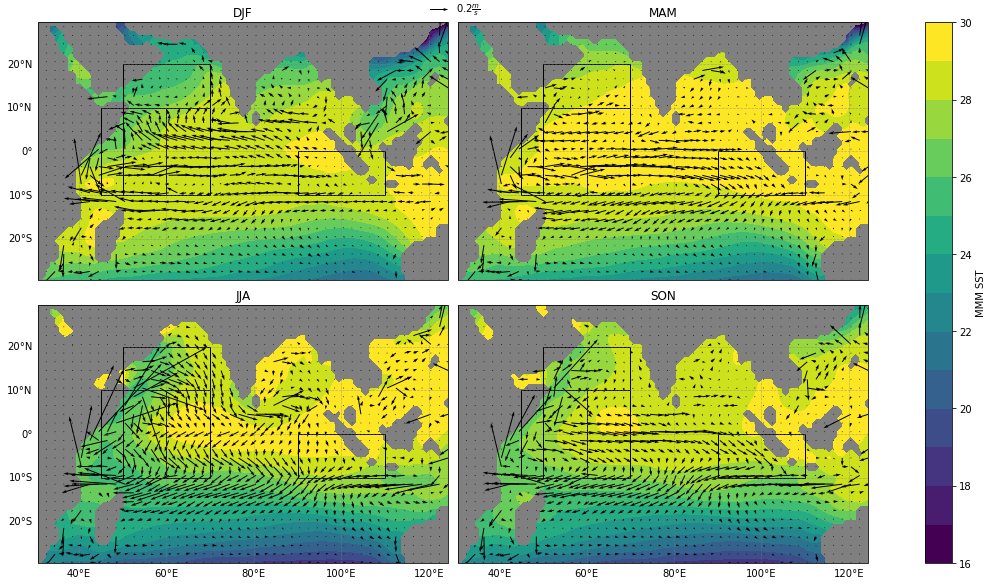

In [44]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = OSST.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 16, vmax = 30, levels =15,  cmap = 'viridis',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='MMM SST'), extend = 'neither') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uRM.lon[::2], uRM.lat[::2], uRM[i, ::2,::2], vRM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uRM.lon[::2], uRM.lat[::2], uRM[i, ::2,::2], vRM[i, ::2,::2],
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

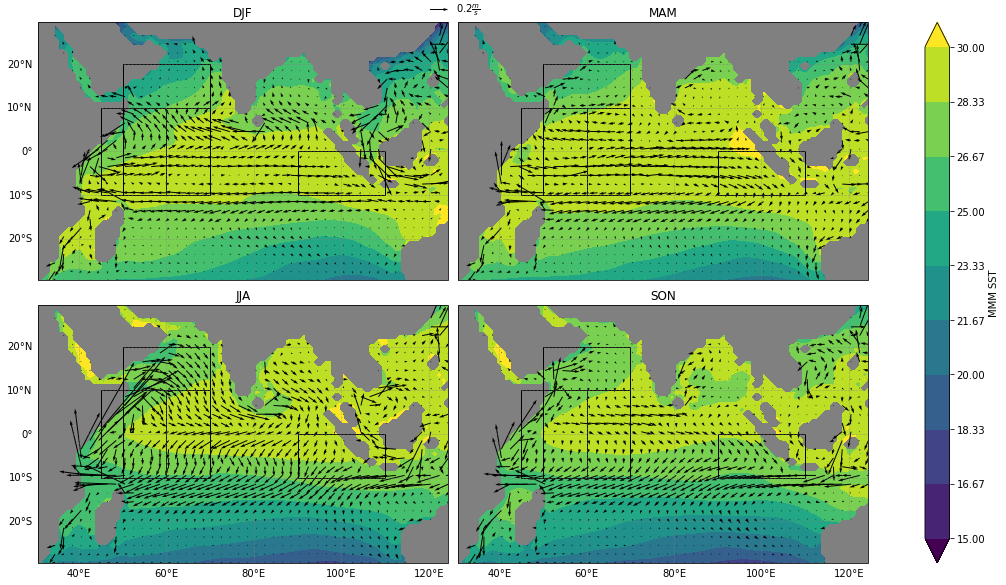

In [133]:
spd_b = spd-spd_r
uB = uMM- uRM
vB = vMM - vRM
fg = sstMM.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 15, vmax = 30, levels =10,  cmap = 'viridis',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='MMM SST'), extend = 'both') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
    else:
        ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2],
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

<ipython-input-188-ef03afbdc265>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
<ipython-input-188-ef03afbdc265>:57: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


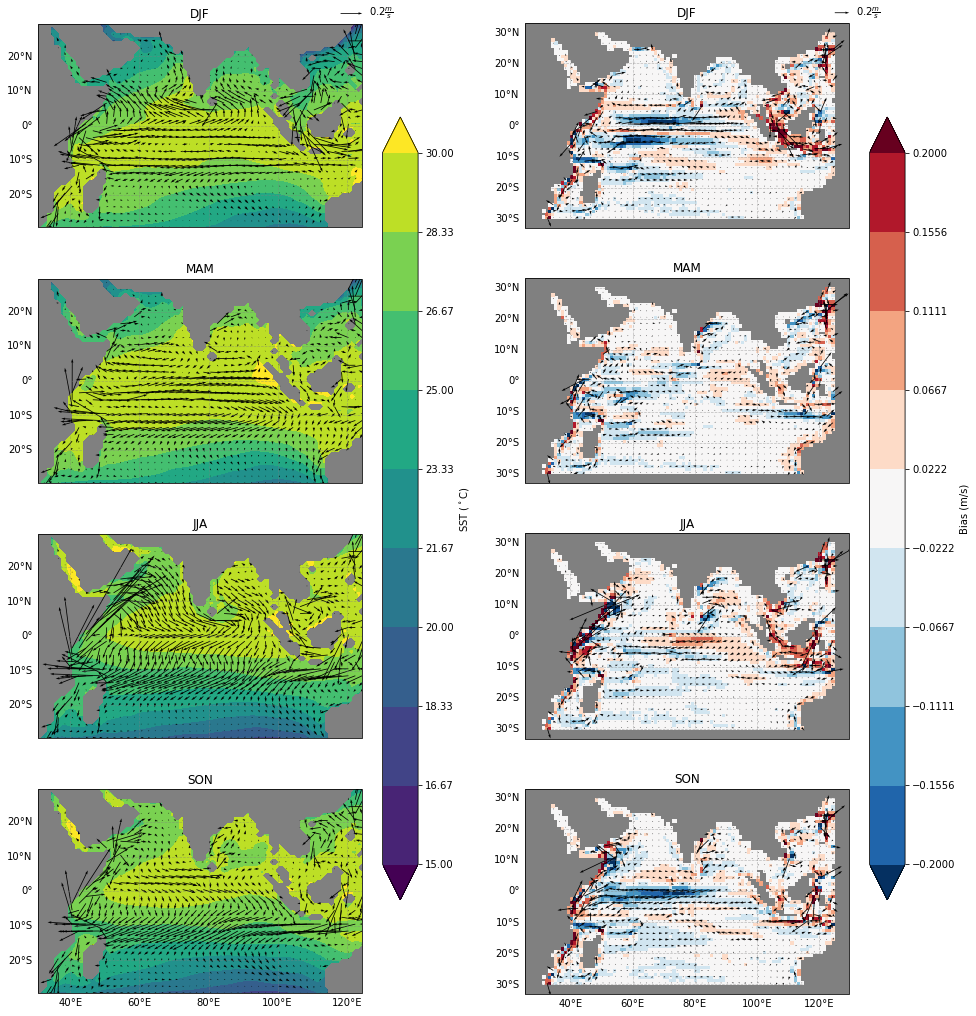

In [188]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Loop through seasons and plot the DataArrays
for i, season in enumerate(seasons):
    # Plot da1 in column 1
    m = sstMM.sel(season=season).plot.contourf(ax=axes[i, 0], vmin = 15, vmax = 30, levels = 10, cmap='viridis', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,0].quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
        qk = axes[i,0].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,0].quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2],
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    axes[i,0].set_facecolor('grey')
    gl = axes[i,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 0].set_title(f'{season}')
    
    # Plot da2 in column 2
    b = spd_b.sel(season=season).plot(ax=axes[i, 1], vmin = -0.2, vmax = 0.2, levels = 10, cmap='RdBu_r', 
                                    extend = "both", add_colorbar = False, transform=ccrs.PlateCarree())
    if i ==0:
        Q = axes[i,1].quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 4.5)
        qk = axes[i,1].quiverkey(Q, 1, 1.05, 0.2, r'$0.2 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')   
    else:
        axes[i,1].quiver(uB.lon[::2], uB.lat[::2], uB[i, ::2,::2], vB[i, ::2,::2],
                  transform=ccrs.PlateCarree(), scale = 4.5)
    #ax.coastlines()
    axes[i,1].set_facecolor('grey')
    gl = axes[i,1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1,2]:
        gl.bottom_labels = False
    gl.top_labels = False
    gl.right_labels = False
    axes[i, 1].set_title(f'{season}') 
cbar1 = plt.colorbar(m, ax=axes[:, 0], orientation='vertical', shrink=0.8, pad=0.05)
cbar1.set_label('SST ($^\circ$C) ')

# Add a colorbar for da2 spanning the entire right column
cbar2 = plt.colorbar(b, ax=axes[:, 1], orientation='vertical', shrink=0.8, pad=0.05)
cbar2.set_label('Bias (m/s)')    

# Adjust spacing between subplots
plt.tight_layout()


In [109]:
test = xr.concat([sstMM, sstbias], dim = 'set')

In [125]:
test

<xarray.DataArray 'tos' (set: 2, season: 4, lat: 60, lon: 95)>
dask.array<concatenate, shape=(2, 4, 60, 95), dtype=float32, chunksize=(1, 1, 60, 95), chunktype=numpy.ndarray>
Coordinates:
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
Dimensions without coordinates: set